<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Data-wrangling-and-cleaning" data-toc-modified-id="Data-wrangling-and-cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data wrangling and cleaning</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

# Loading data

In [2]:
#Load data
df1 = pd.read_csv('takehome_users.csv', parse_dates=['creation_time','last_session_creation_time'], encoding="ISO-8859-1")
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
#Convert to datetime format
df1['creation_time'] = pd.to_datetime(df1['creation_time'])

#Tried to convert last session creation time to date time format but couldn't figure out how.  
#The below code and various combinations of it reads as an error or comes out meaningless.
#When converted always comes out as a float or something like 1970-01-01 00:00:01.398138810
#df1['last_session_creation_time'] = pd.to_datetime(df1['last_session_creation_time'])

In [5]:
#Considered dropping last session creation time due to not being able to understand the meaning
#Decided to keep it being it may contain important information even if I don't understand it
#df1 = df1.drop(columns = ['last_session_creation_time'])

In [6]:
df1.head() 

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [7]:
#Load second dataframe
df2= pd.read_csv('takehome_user_engagement.csv')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


# Data wrangling and cleaning

In [9]:
#Convert to datatime format
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'])

In [10]:
#Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period.
#7 day rolling average
rolling_df = df2.groupby('user_id').rolling('7D', on='time_stamp').visited.sum().reset_index()

#Create adoption column based on 7 day rolling dataframe 
rolling_df.visited = rolling_df['visited'].astype('int')
rolling_df['adoption'] = np.where(rolling_df['visited'] >= 3, 1, 0)

df_adopt = rolling_df.groupby('user_id').adoption.sum().reset_index(name ='adopted')

#view 10 sample rows from dataframe
df_adopt.sample(10)

,user_id,adopted
6747,9193,0
1664,2297,9
6337,8667,0
8496,11560,0
7858,10683,1
5122,7010,0
261,340,0
1055,1466,0
4982,6822,0
3748,5119,0


In [11]:
#Add column of total visits by user
df_adopt['tot_visits'] = df2.groupby('user_id')['visited'].count().to_frame()

In [12]:
#Convert the adopted to 1's and 0's
df_adopt['adopted'] = np.where(df_adopt['adopted'] >= 1, 1, 0)
df_adopt.head()

,user_id,adopted,tot_visits
0,1,0,NaN
1,2,1,1.0
2,3,0,14.0
3,4,0,1.0
4,5,0,1.0


In [13]:
print('Value counts of adoption')
print(df_adopt['adopted'].value_counts())
print('Dataframe shape:', df_adopt.shape)

Value counts of adoption
0    7221
1    1602
Name: adopted, dtype: int64
Dataframe shape: (8823, 3)


In [14]:
df = df1.join(df_adopt.set_index('user_id'), on ='object_id')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,tot_visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0,0.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0,1.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0,0.0,14.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0,0.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0,0.0,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted                     8823 non-null   float64       
 11  tot_visits                  6457 non-null   float64   

In [16]:
df.shape

(12000, 12)

In [17]:
#View values and na counts for adopted
df.adopted.value_counts(dropna=False)

0.0    7221
NaN    3177
1.0    1602
Name: adopted, dtype: int64

In [18]:
#Replace na's with 0 in adopted, assumes that if na is present they are not adopted
df.adopted.fillna(0, inplace = True)
df.adopted.value_counts(dropna = False)

0.0    10398
1.0     1602
Name: adopted, dtype: int64

In [19]:
#Replace na's in invited by user id, assumes that if na is present then no one invited them
df.invited_by_user_id.fillna(0, inplace = True)

#Replace na's in tot_visits, assumes that if na is present they did not visit
df.tot_visits.fillna(0, inplace = True)

In [20]:
df['invited_by_user_id'] = df.invited_by_user_id.astype('bool').astype('int')

In [21]:
df['invited_by_user_id'].value_counts(dropna = False)

1    6417
0    5583
Name: invited_by_user_id, dtype: int64

In [22]:
#Drop object id (user id), email, and name.  These are not important for modeling.
df = df.drop(columns = ['object_id', 'email', 'name'])

In [23]:
print(max(df['creation_time']))
print(min(df['creation_time']))

2014-05-30 23:59:19
2012-05-31 00:43:27


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   creation_source             12000 non-null  object        
 2   last_session_creation_time  8823 non-null   object        
 3   opted_in_to_mailing_list    12000 non-null  int64         
 4   enabled_for_marketing_drip  12000 non-null  int64         
 5   org_id                      12000 non-null  int64         
 6   invited_by_user_id          12000 non-null  int32         
 7   adopted                     12000 non-null  float64       
 8   tot_visits                  12000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(2)
memory usage: 797.0+ KB


# EDA

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

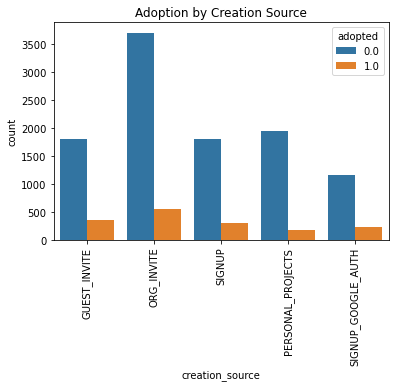

In [26]:
sns.countplot(x='creation_source', hue='adopted', data=df)
plt.title('Adoption by Creation Source')
plt.xticks(rotation=90)
plt.show()

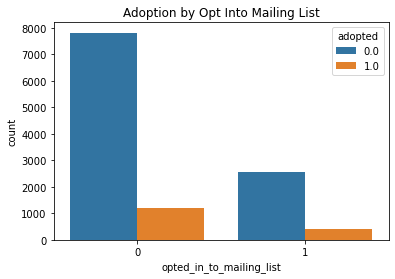

In [27]:
sns.countplot(x='opted_in_to_mailing_list', hue='adopted', data=df)
plt.title('Adoption by Opt Into Mailing List')
plt.show()

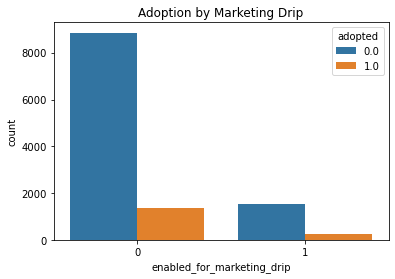

In [28]:
sns.countplot(x='enabled_for_marketing_drip', hue='adopted', data=df)
plt.title('Adoption by Marketing Drip')
plt.show()

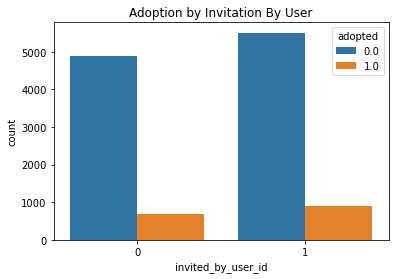

In [29]:
sns.countplot(x='invited_by_user_id', hue='adopted', data=df)
plt.title('Adoption by Invitation By User')
plt.show()

In [30]:
#mean number of visits of adopted users
print('mean number of vistis of adopted users:', sum(df[df['adopted'] == 1]['tot_visits']) / len(df[df['adopted'] == 1]))
#mean number of visits by not adopted users
print('mean number of vistis of not adopted users:', sum(df[df['adopted'] == 0]['tot_visits']) / len(df[df['adopted'] == 0]))

mean number of vistis of adopted users: 18.95505617977528
mean number of vistis of not adopted users: 11.905077899596076


In [31]:
print('number of organizations in org_id:', len(df.org_id.unique()))

number of organizations in org_id: 417


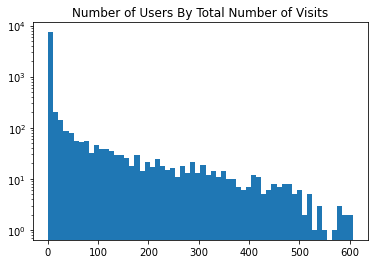

In [32]:
plt.hist(df2.groupby('user_id').visited.count(), bins = 60)
plt.title('Number of Users By Total Number of Visits')
plt.yscale('log')
plt.show()

In [33]:
df.groupby('adopted').mean()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,tot_visits
adopted,,,,,
0.0,0.248125,0.148682,138.742835,0.529333,11.905078
1.0,0.258427,0.153558,162.276529,0.569913,18.955056


Only total visits provides a clear distinction between adoption or not.  The rest of the EDA does not proved much in the way of a clear reason why there is a difference between adoption or not.  The histogram of visits by users demonstrates that by far most users visit the product a very few times.

# Modeling

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   creation_source             12000 non-null  object        
 2   last_session_creation_time  8823 non-null   object        
 3   opted_in_to_mailing_list    12000 non-null  int64         
 4   enabled_for_marketing_drip  12000 non-null  int64         
 5   org_id                      12000 non-null  int64         
 6   invited_by_user_id          12000 non-null  int32         
 7   adopted                     12000 non-null  float64       
 8   tot_visits                  12000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(2)
memory usage: 797.0+ KB


In [37]:
df.last_session_creation_time.fillna(0, inplace = True)

In [38]:
df['creation_time'] = df['creation_time'].values.astype('int')
df['last_session_creation_time'] = df['last_session_creation_time'].values.astype('int')
df['creation_source'] = df['creation_source'].astype('category')
df['org_id'] = df['org_id'].astype('category')

In [39]:
df = pd.get_dummies(df, columns = ['creation_source'], drop_first=True)

In [40]:
df.head()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,tot_visits,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,213697536,1398138810,1,0,11,1,0.0,0.0,0,0,0,0
1,-1912111104,1396237504,0,0,1,1,1.0,1.0,1,0,0,0
2,-1384695808,1363734892,0,0,94,1,0.0,14.0,1,0,0,0
3,623849472,1369210168,0,0,1,1,0.0,1.0,0,0,0,0
4,552261632,1358849660,0,0,193,1,0.0,1.0,0,0,0,0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['adopted']), df.adopted, test_size=0.3, random_state=42)

## Logistic Regression

In [42]:
#Create logistic regression classifier
lrc = LogisticRegression(max_iter=200, random_state = 42)

#Hyperparameter grid
log_params = {'penalty': ['l1', 'l2', 'none'], 
              'C' : [0.001, 0.1, 1, 10, 100]}

In [43]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[['creation_time', 'last_session_creation_time', 'tot_visits']])
X_test_scaled = scaler.fit_transform(X_test[['creation_time', 'last_session_creation_time', 'tot_visits']])

In [44]:
logReg_cv = GridSearchCV(lrc, log_params, n_jobs=5, cv=5, scoring='roc_auc')
logReg_cv.fit(X_train_scaled, y_train)

#Best accuracy score and hyperparameters for model
print("Best Score:" + str(logReg_cv.best_score_))
print("Best Parameters: " + str(logReg_cv.best_params_))

Best Score:0.9068438730494103
Best Parameters: {'C': 0.001, 'penalty': 'none'}


C:\Users\matta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [45]:
from sklearn.metrics import confusion_matrix

#Confusion matrix and classification report
logReg_pred = logReg_cv.predict(X_test_scaled)
print(confusion_matrix(y_test, logReg_pred))
print(classification_report(y_test, logReg_pred))

[[3114    0]
 [ 486    0]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93      3114
         1.0       0.00      0.00      0.00       486

    accuracy                           0.86      3600
   macro avg       0.43      0.50      0.46      3600
weighted avg       0.75      0.86      0.80      3600



C:\Users\matta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The above logistic regression model does not provide quality predictions.  It does not predict positive adoptions at all and has a 0.0 f1-score for predictions of adoption.

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
#Creat random forest classifier
rfc = RandomForestClassifier(random_state = 42)

#Hyperparameter grid
param_grid = {'n_estimators': [300, 400, 500],
             'max_features': ['auto', 'sqrt'],
             'max_depth' : [9, 10, 11]}

In [48]:
#GridSearchCV for random forest
rfc_cv = GridSearchCV(rfc, param_grid, cv=5, scoring='roc_auc')
#build model    
rfc_cv.fit(X_train, y_train)
#predict using model
y_pred = rfc_cv.predict(X_test)

In [49]:
#Best accuracy score and hyperparameters for model
print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))

Best Score:0.9072116783078291
Best Parameters: {'max_depth': 9, 'max_features': 'auto', 'n_estimators': 400}


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      3114
         1.0       0.73      0.65      0.69       486

    accuracy                           0.92      3600
   macro avg       0.84      0.81      0.82      3600
weighted avg       0.92      0.92      0.92      3600



In [51]:
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(0,2), columns=range(0,2))

,0,1
0,2999,115
1,170,316


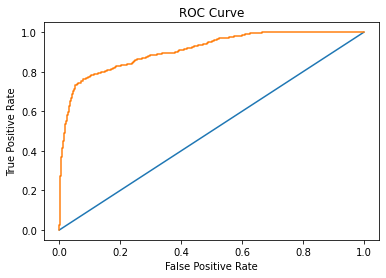

In [52]:
y_pred_proba = rfc_cv.predict_proba(X_test)[:,1]


# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba)

#plot ROC curve
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

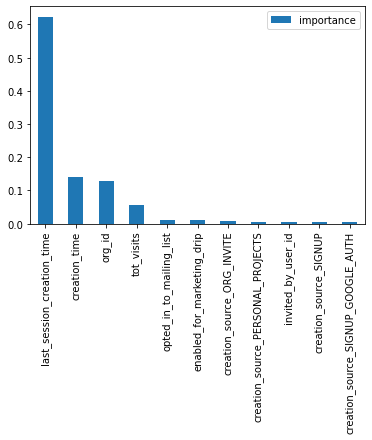

In [53]:
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar')
plt.show()

Last session creation time, creation time, organization, and total visits appear to have the strongest influence on adoption.  The random forest model is significantly better than the logistic regression model but an f1-score of 0.69 for predicting adoption is still pretty low.  

# Conclusion

Through exploritory data analysis and modeling it was determined that creation time, creation time, organization, and total visits have the strongest influence on user adoption.  